In [1]:
#Import
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
from scipy.misc import imread
import random


#Load file
sql_conn = sqlite3.connect('.../input/database.sqlite')
df = pd.read_sql("SELECT * from Sentiment", sql_conn)

In [2]:
#List of column names
list_of_tables = sql_conn.execute("SELECT * FROM sqlite_master where type='table'")
print(list_of_tables.fetchall())

[('table', 'Sentiment', 'Sentiment', 2, 'CREATE TABLE Sentiment (\n    id INTEGER PRIMARY KEY,\n    candidate TEXT,\n    candidate_confidence NUMERIC,\n    relevant_yn TEXT,\n    relevant_yn_confidence NUMERIC,\n    sentiment TEXT,\n    sentiment_confidence NUMERIC,\n    subject_matter TEXT,\n    subject_matter_confidence NUMERIC,\n    candidate_gold TEXT,\n    name TEXT,\n    relevant_yn_gold TEXT,\n    retweet_count INTEGER,\n    sentiment_gold TEXT,\n    subject_matter_gold TEXT,\n    text TEXT,\n    tweet_coord TEXT,\n    tweet_created TEXT,\n    tweet_id INTEGER,\n    tweet_location TEXT,\n    user_timezone TEXT)')]


In [3]:
#Filter Candidate on Trump
e = pd.read_sql_query("Select text From Sentiment where candidate like '%Trump%' limit 1000",sql_conn)


cs = ""
for i in range(len(e.text)):
    cs += str(e.text[i])
    

In [4]:
#mask
d = path.dirname('...Politics/usa.png')

mask = np.array(Image.open(path.join(d, '...Politics/usamask.png')))


# adding specific stopwords
stopwords = STOPWORDS.copy()
stopwords.add("RT")
stopwords.add("https")

#Generate WordCloud
wc = WordCloud(font_path='...Politics/georgia.ttf', background_color="white",width=5000,
                      height=2500, max_words=3000, mask=mask,stopwords=stopwords,margin=1,random_state=1, relative_scaling=.5)
wc.generate(cs)


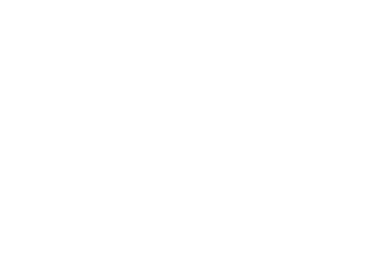

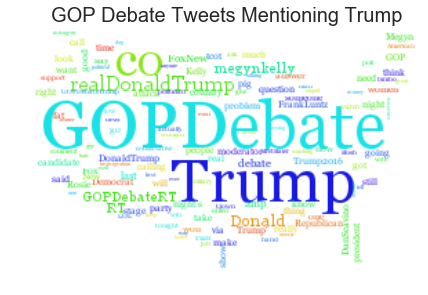

In [5]:
# store default colored image
default_colors = wc.to_array()
wc.to_file("usa2.png")
plt.axis("off")
plt.figure(figsize=(7,5))
plt.title("GOP Debate Tweets Mentioning Trump", size=20)
plt.imshow(default_colors)
plt.axis("off")
plt.show()

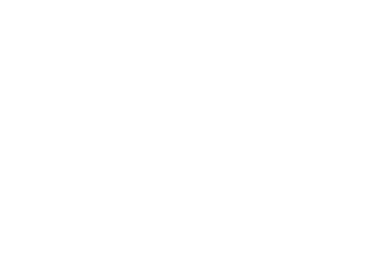

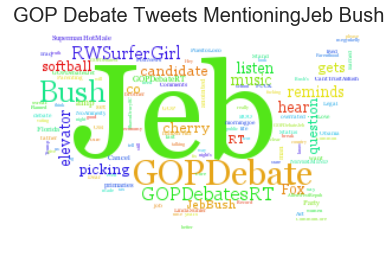

In [6]:
#Filter Candidate on Jeb Bush
f = pd.read_sql_query("Select text From Sentiment where candidate like '%Jeb Bush%' limit 2000",sql_conn)

# adding specific stopwords
stopwords = STOPWORDS.copy()
stopwords.add("RT")
stopwords.add("https")
    
cs2 = ""
for i in range(len(f.text)):
    cs2 += str(f.text[i])
wc.generate(cs2)


# store default colored image
default_colors = wc.to_array()
plt.axis("off")
plt.figure()
plt.title("GOP Debate Tweets MentioningJeb Bush", size=20)
plt.imshow(default_colors)
plt.axis("off")
plt.show()